# 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Dataset

In [2]:
df = pd.read_csv('Healthcare-Diabetes.csv')

# 3. Data Exploration and Data Cleaning

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


**Data dictionary:**

**1. Id:** Unique identifier for each data entry.

**2. Pregnancies:** Number of times pregnant.

**3. Glucose:** Plasma glucose concentration over 2 hours in an oral glucose tolerance test.

**4. BloodPressure:** Diastolic blood pressure (mm Hg).

**5. SkinThickness:** Triceps skinfold thickness (mm).

**6. Insulin:** 2-Hour serum insulin (mu U/ml).

**7. BMI:** Body mass index (weight in kg / height in m^2).

**8. DiabetesPedigreeFunction:** Diabetes pedigree function, a genetic score of diabetes.

**9. Age:** Age in years.

**10. Outcome:** Binary classification indicating the presence (1) or absence (0) of diabetes.

**A little detail on how various variables are related to diabetes:**

1. `Pregnancies` - The higher the number of pregnancies, the worse the diabetic condition can become.
2. `Glucose`- Higher glucose levels can cause diabetic problems.
3. `Blood Pressure` - People with high blood pressure usually have insulin resistance and an increased risk of developing diabetes compared to those with typical blood pressure.
4. `Skin thickness` - Skin thickness is not considered a direct cause or risk factor for diabetes. While skin thickness can change due to various factors, including age and exposure to environmental elements, these changes do not play a significant role in the development of diabetes.
5. `Insulin` - Insulin helps blood sugar enter the body's cells so it can be used for energy. Insulin also signals the liver to store blood sugar for later use. Blood sugar enters cells, and levels in the bloodstream decrease, signaling insulin to decrease too. In type 2 diabetes, instead of moving into the cells, sugar builds up in the blood. As blood sugar levels rise, the pancreas releases more insulin. Eventually, the cells in the pancreas that make insulin become damaged and can't make enough insulin to meet the body's needs.
6. `BMI` - The accumulation of an excessive amount of body fat can cause type 2 diabetes, and the risk of type 2 diabetes increases linearly with an increase in body mass index.
7. `Diabetes Pedigree Function` - The Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her family history of diabetes.

In [4]:
print('Shape :',df.shape)
print('Size :',df.size)

Shape : (2768, 10)
Size : 27680


In [5]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.rename(columns = {'Outcome' : 'Diabetic'}, inplace = True)
df.head(5)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


**Detecting missing values**

In [8]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetic                    0
dtype: int64

There are no missing values in the dataset.

**Detecting missing values**

In [9]:
df.duplicated().sum()

0

There are no duplicate record.

In [10]:
df.agg({
    'Pregnancies' : 'median',
    'Glucose' : 'median',
    'BloodPressure' : 'median',
    'SkinThickness' : 'median',
    'Insulin' : 'median', 
    'BMI' : 'median',
    'DiabetesPedigreeFunction' : 'median',
    'Age' : 'median'
    })

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                23.000
Insulin                      37.000
BMI                          32.200
DiabetesPedigreeFunction      0.375
Age                          29.000
dtype: float64

**Checking the distribution of the data for individual variables**

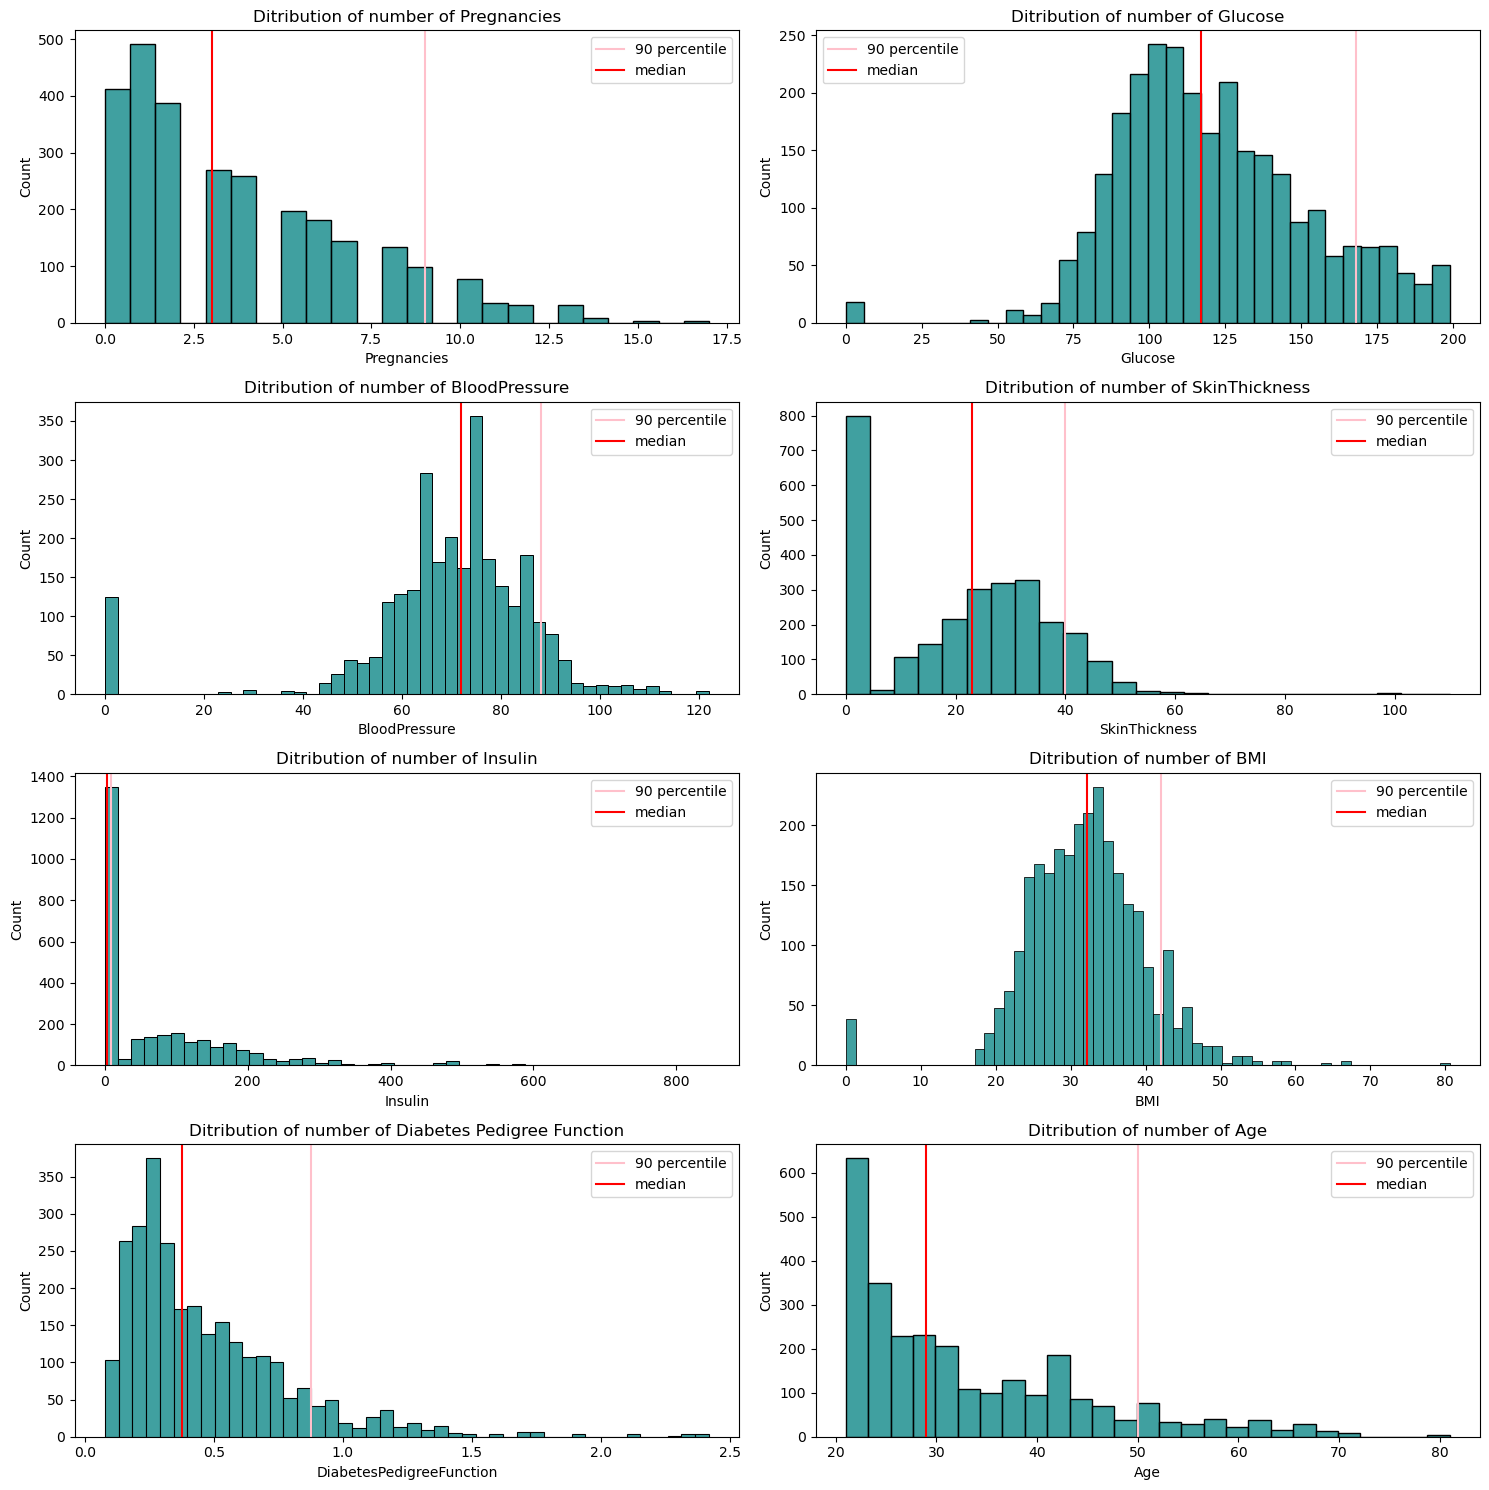

In [11]:
fig, axes = plt.subplots(4,2, figsize = (15,15))
sns.histplot(df['Pregnancies'], ax = axes[0,0], color = 'teal')
axes[0,0].set_title('Ditribution of number of Pregnancies')
axes[0,0].axvline(df['Pregnancies'].quantile(.90), color = 'pink', label = '90 percentile')
axes[0,0].axvline(df['Pregnancies'].quantile(.50), color = 'red', label = 'median')
axes[0,0].legend()

sns.histplot(df['Glucose'], ax = axes[0,1],color = 'teal')
axes[0,1].set_title('Ditribution of number of Glucose')
axes[0,1].axvline(df['Glucose'].quantile(.90), color = 'pink', label = '90 percentile')
axes[0,1].axvline(df['Glucose'].quantile(.50), color = 'red', label = 'median')
axes[0,1].legend()

sns.histplot(df['BloodPressure'], ax = axes[1,0], color = 'teal')
axes[1,0].set_title('Ditribution of number of BloodPressure')
axes[1,0].axvline(df['BloodPressure'].quantile(.90), color = 'pink', label = '90 percentile')
axes[1,0].axvline(df['BloodPressure'].quantile(.50), color = 'red', label = 'median')
axes[1,0].legend()

sns.histplot(df['SkinThickness'], ax = axes[1,1], color = 'teal')
axes[1,1].set_title('Ditribution of number of SkinThickness')
axes[1,1].axvline(df['SkinThickness'].quantile(.90), color = 'pink', label = '90 percentile')
axes[1,1].axvline(df['SkinThickness'].quantile(.50), color = 'red', label = 'median')
axes[1,1].legend()

sns.histplot(df['Insulin'], ax = axes[2,0], color = 'teal')
axes[2,0].set_title('Ditribution of number of Insulin')
axes[2,0].axvline(df['Pregnancies'].quantile(.90), color = 'pink', label = '90 percentile')
axes[2,0].axvline(df['Pregnancies'].quantile(.50), color = 'red', label = 'median')
axes[2,0].legend()

sns.histplot(df['BMI'], ax = axes[2,1], color = 'teal')
axes[2,1].set_title('Ditribution of number of BMI')
axes[2,1].axvline(df['BMI'].quantile(.90), color = 'pink', label = '90 percentile')
axes[2,1].axvline(df['BMI'].quantile(.50), color = 'red', label = 'median')
axes[2,1].legend()

sns.histplot(df['DiabetesPedigreeFunction'], ax = axes[3,0], color = 'teal')
axes[3,0].set_title('Ditribution of number of Diabetes Pedigree Function')
axes[3,0].axvline(df['DiabetesPedigreeFunction'].quantile(.90), color = 'pink', label = '90 percentile')
axes[3,0].axvline(df['DiabetesPedigreeFunction'].quantile(.50), color = 'red', label = 'median')
axes[3,0].legend()

sns.histplot(df['Age'], ax = axes[3,1], color = 'teal')
axes[3,1].set_title('Ditribution of number of Age')
axes[3,1].axvline(df['Age'].quantile(.90), color = 'pink', label = '90 percentile')
axes[3,1].axvline(df['Age'].quantile(.50), color = 'red', label = 'median')
axes[3,1].legend()

plt.tight_layout()

- `BloodPressure`, `Glucose`, `BMI` are approximately normally distributed.
- The variable `Insulin` in clustered together.
- `Age`, `Pregnancies`, `DiabetesPedigreeFunction` are skewed to the right.

**Checking outliers for existence**

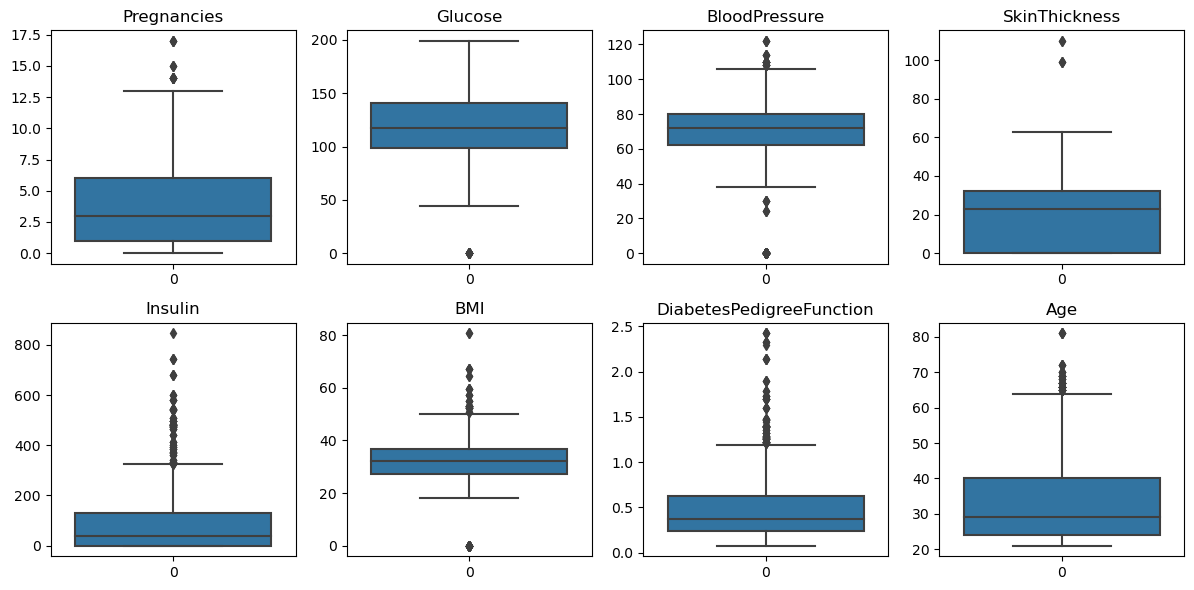

In [12]:
fig, axes = plt.subplots(2,4, figsize = (12,6))

sns.boxplot(df['Pregnancies'], ax = axes[0,0])
axes[0,0].set_title('Pregnancies')

sns.boxplot(df['Glucose'], ax = axes[0,1])
axes[0,1].set_title('Glucose')

sns.boxplot(df['BloodPressure'], ax = axes[0,2])
axes[0,2].set_title('BloodPressure')

sns.boxplot(df['SkinThickness'], ax = axes[0,3])
axes[0,3].set_title('SkinThickness')

sns.boxplot(df['Insulin'], ax = axes[1,0])
axes[1,0].set_title('Insulin')

sns.boxplot(df['BMI'], ax = axes[1,1])
axes[1,1].set_title('BMI')

sns.boxplot(df['DiabetesPedigreeFunction'], ax = axes[1,2])
axes[1,2].set_title('DiabetesPedigreeFunction')

sns.boxplot(df['Age'], ax = axes[1,3])
axes[1,3].set_title('Age')

plt.tight_layout()

- All the variables contain outliers.

- In the cases of BMI, Glucose, and BloodPressure, outliers are observed with values equal to 0, which is implausible. Therefore, due to its unusual behaviour we will remove these observations from the dataset.

In [13]:
# the variable glucose doesn't contain any outlier above the upper quartile. 
# Therefore, we will only remove the outlier present below the lower quartile.
q1 = df['Glucose'].quantile(.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3-q1

lower_quartile = q1 - (iqr * 1.5)
lower_array = np.where(df['Glucose']<=lower_quartile)[0]
 
df.drop(index=lower_array).reset_index(inplace = True)

df.shape

(2768, 10)

In [14]:
# we will only be removing the outlier present below the lower quartile.
q1 = df['BloodPressure'].quantile(.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3-q1

lower_quartile = q1 - (iqr * 1.5)

lower_array = np.where(df['BloodPressure'] <= lower_quartile)[0]
 
df.drop(index=lower_array).reset_index(inplace = True)

df.shape

(2768, 10)

In [15]:
# we will only be removing the outlier present below the lower quartile.
q1 = df['BMI'].quantile(.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1

lower_quartile = q1 - (iqr * 1.5)

lower_array = np.where(df['BMI'] <= lower_quartile)[0]
 
df.drop(index=lower_array, inplace=True)

df.shape

(2729, 10)

In [16]:
round(df['Diabetic'].value_counts(normalize = True)*100,2)

0    65.3
1    34.7
Name: Diabetic, dtype: float64

65% of the sample is non diabetic and 34.3% are diabetic.

**Checking whether the extreme values are more prone to diabetes.**

In [17]:
diabetic = df[df['Age'] > np.percentile(df['Age'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True)*100,2)

0    54.98
1    45.02
Name: Diabetic, dtype: float64

In [18]:
diabetic = df[df['Pregnancies'] > np.percentile(df['Pregnancies'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    52.0
0    48.0
Name: Diabetic, dtype: float64

In [19]:
diabetic = df[df['Glucose'] > np.percentile(df['Glucose'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    83.0
0    17.0
Name: Diabetic, dtype: float64

In [20]:
diabetic = df[df['BloodPressure'] > np.percentile(df['BloodPressure'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

0    53.0
1    47.0
Name: Diabetic, dtype: float64

In [21]:
diabetic = df[df['SkinThickness'] > np.percentile(df['SkinThickness'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    51.0
0    49.0
Name: Diabetic, dtype: float64

In [22]:
diabetic = df[df['Insulin'] > np.percentile(df['Insulin'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    52.0
0    48.0
Name: Diabetic, dtype: float64

In [23]:
diabetic = df[df['BMI'] > np.percentile(df['BMI'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    61.0
0    39.0
Name: Diabetic, dtype: float64

In [24]:
diabetic = df[df['DiabetesPedigreeFunction'] > np.percentile(df['DiabetesPedigreeFunction'], 90)]
round(diabetic['Diabetic'].value_counts(normalize = True),2)*100

1    52.0
0    48.0
Name: Diabetic, dtype: float64

**Using a scatterplot to determine the relationship among different variables.**

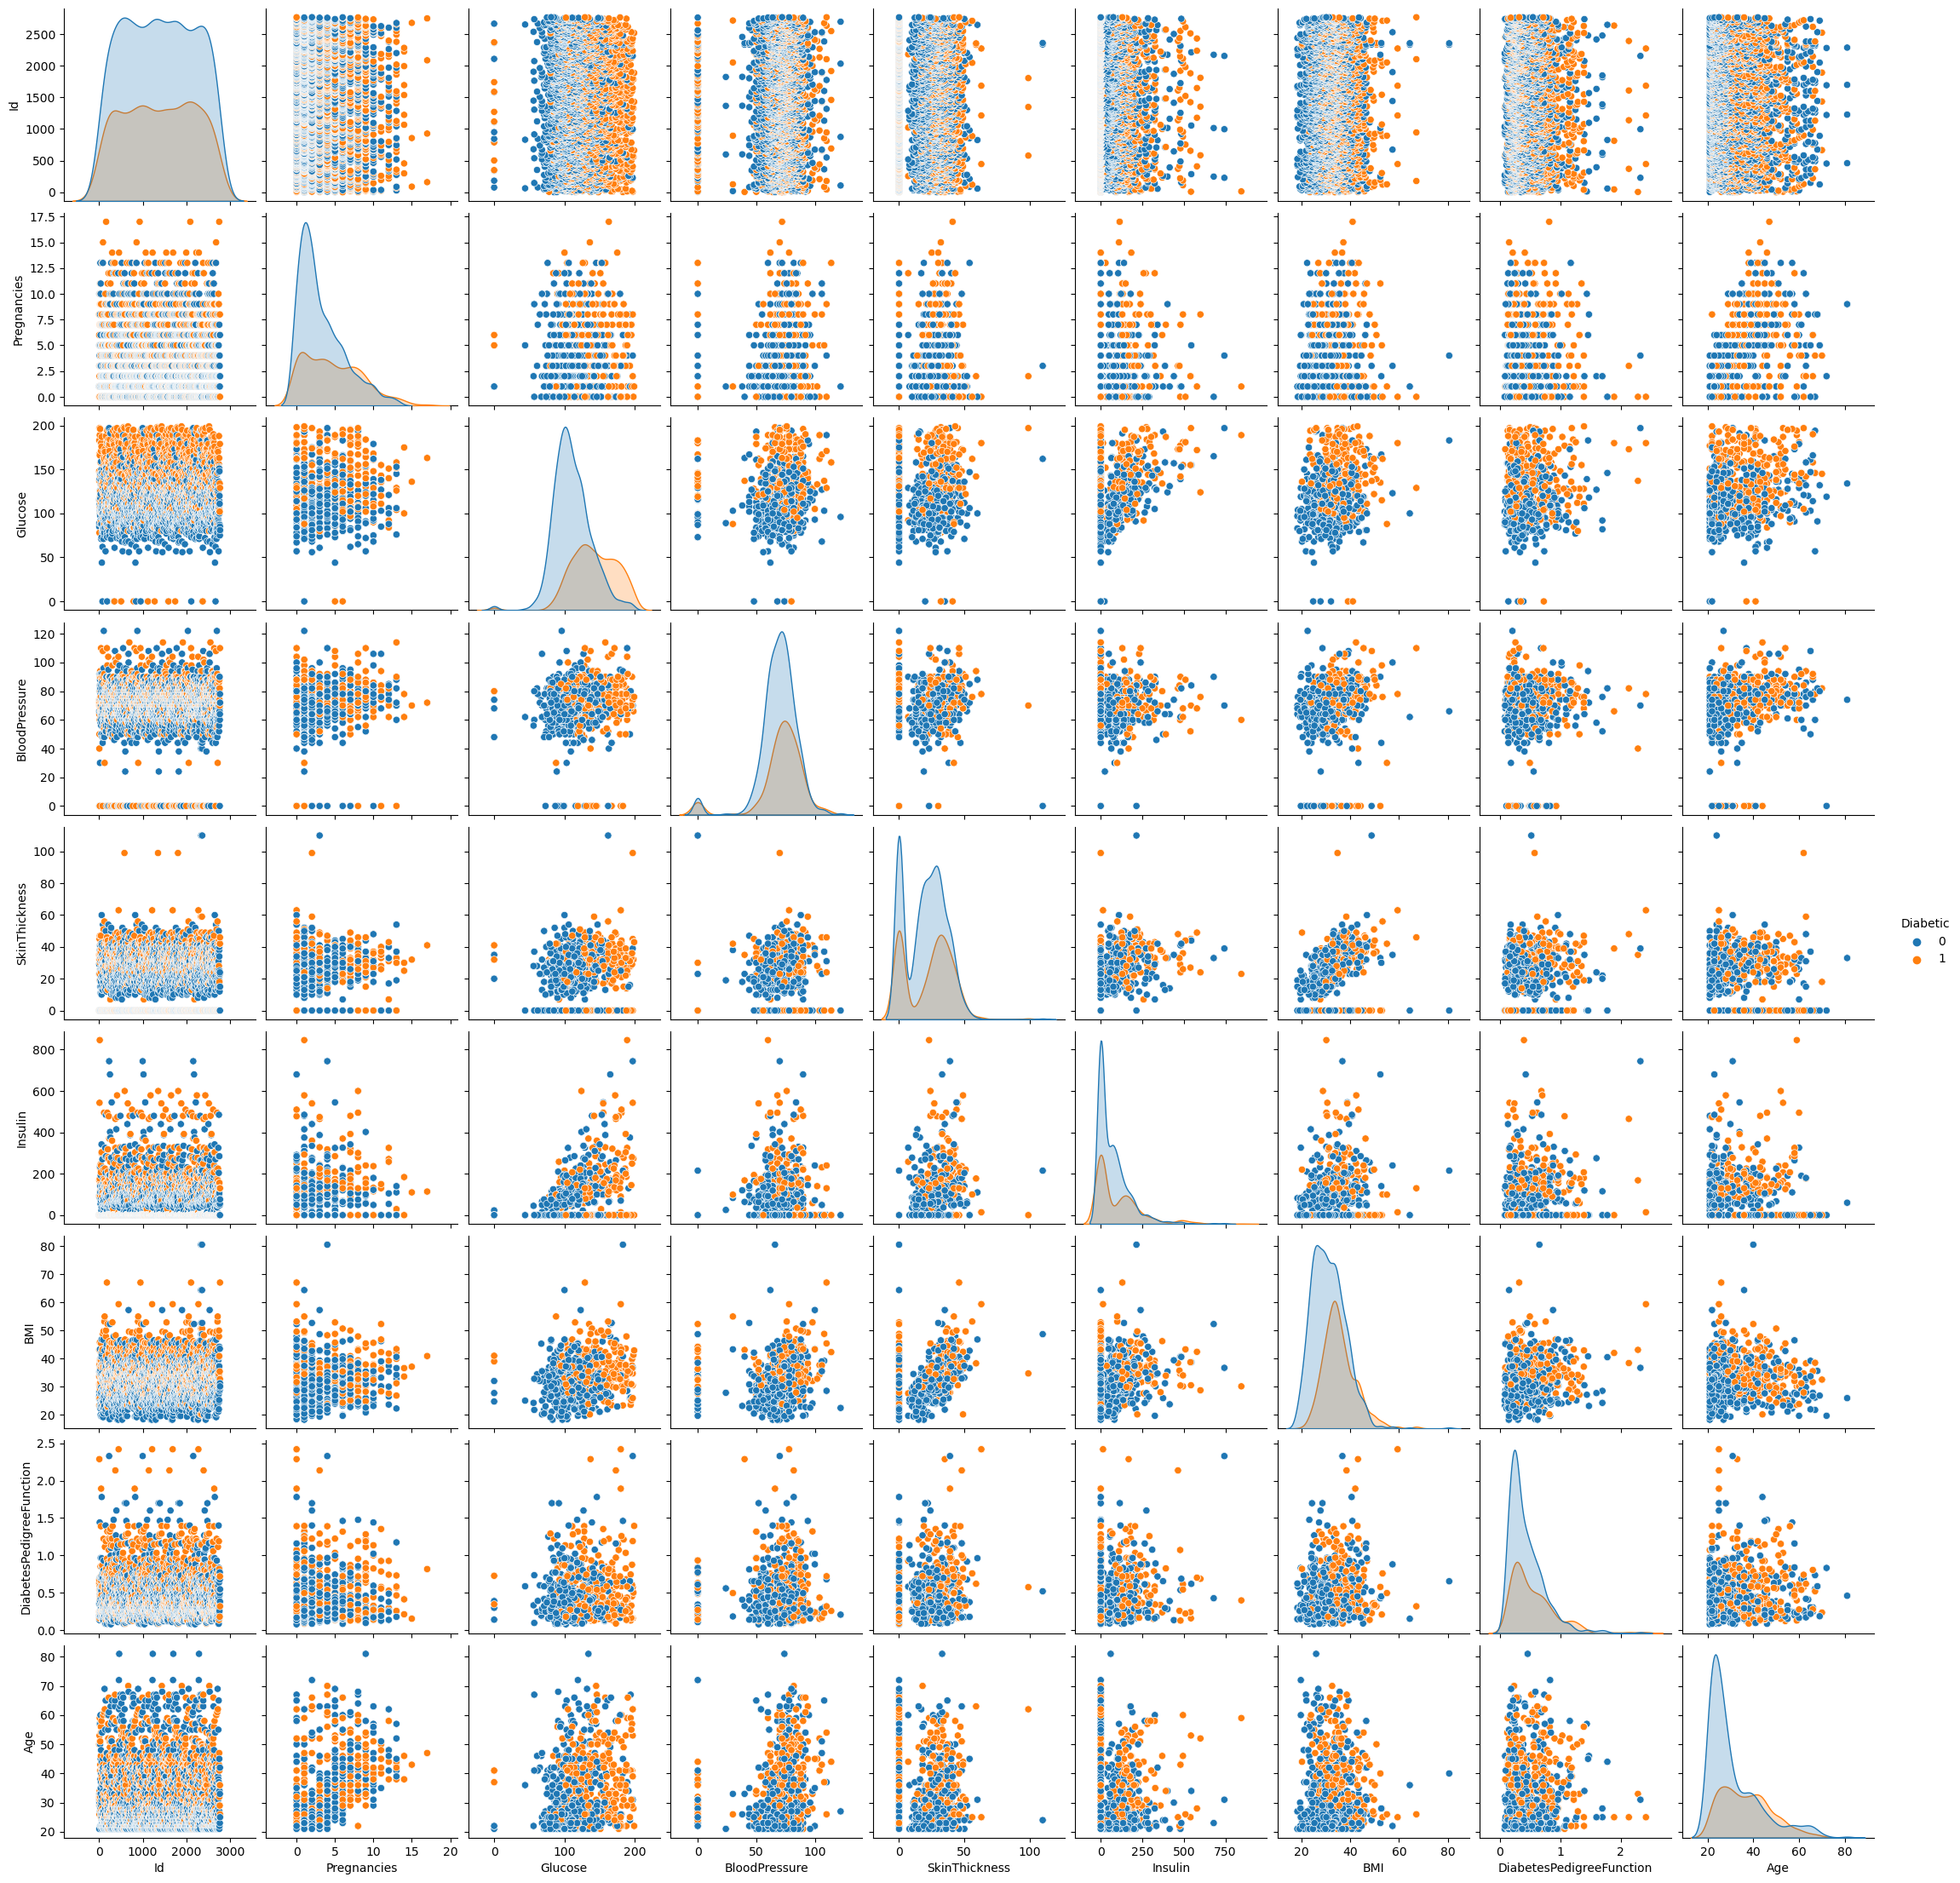

In [25]:
sns.pairplot(df, hue = 'Diabetic')

The scatterplot doesn't show the correlations clearly. Therefore, we will plot a heatmap.

<Axes: >

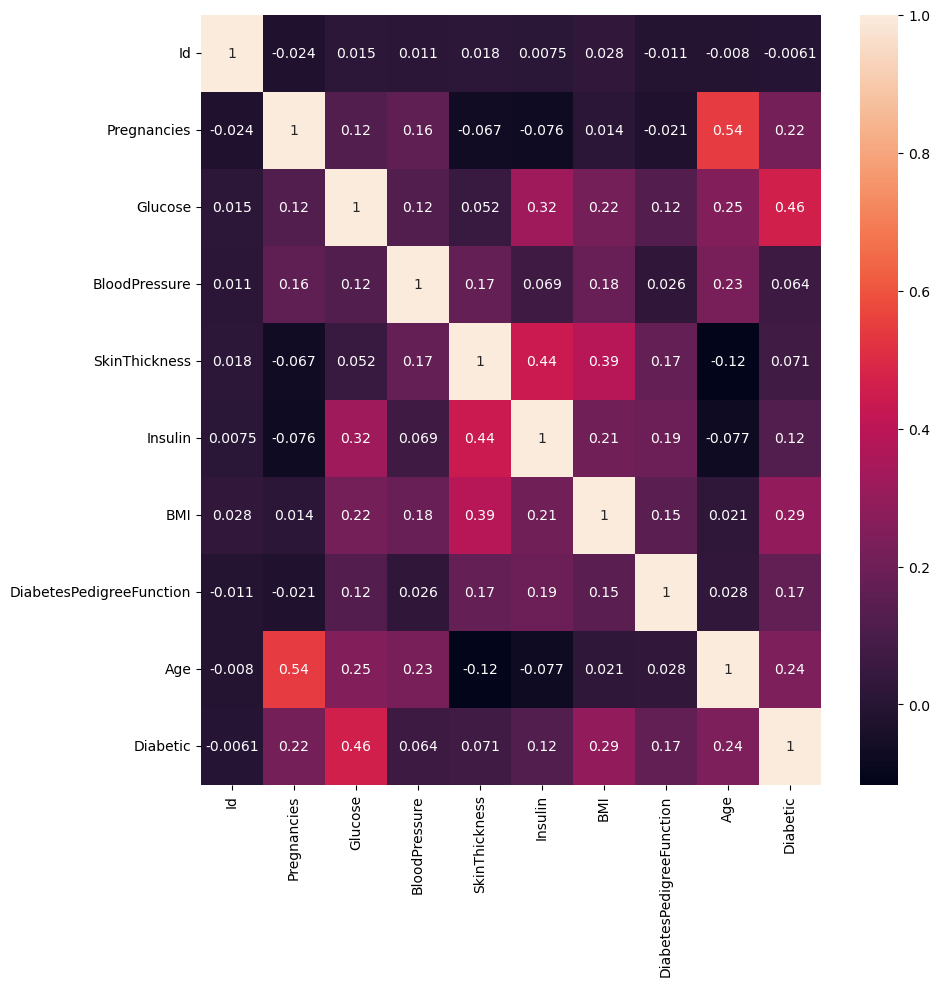

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

The variables `Glucose` (0.46), `BMI` (0.28), `Age` (0.23), and `Pregnancies` (0.22) show a stronger correlation with diabetes compared to other variables, indicating they are potential predictor variables. Additionally, `DiabetesPedigreeFunction` (0.16) and `Insulin` (0.12) also exhibit some correlation.

However, `SkinThickness` and `BloodPressure` do not appear to be strongly correlated with the predictor variable. While they could potentially be interactive variables, confirming their relationship would require more information. Therefore, for now, we will not include them in our model.